In [ ]:
from lsts import LongTermForecast

ltf = LongTermForecast(
    pred_len=96, 
    variable="soil_temperature", 
    model_name="TimesNet"
)

In [ ]:
import pandas as pd
df = pd.read_csv("soil_temperature_example.csv")
df.rename(columns={"date_time": "date"}, inplace=True)
seq = df[:512].copy()
label = df[512: 512 + 96].copy()

In [ ]:
pred = ltf.pred(seq)

In [ ]:
pred

In [ ]:
ltf.visual(seq, pred, "soil_temperature", "soil_temperature_dlinear.pdf", label)

In [ ]:
label

In [ ]:
from lsts.short_term_forecast import ShortTermForecast

In [ ]:
stf = ShortTermForecast(
    variable="soil_temperature", 
    model_name="PatchTST"
)

In [ ]:
import pandas as pd
df = pd.read_csv("soil_temperature_example.csv")
df.rename(columns={"date_time": "date"}, inplace=True)
seq = df[:48].copy()
label = df[48: 48 + 48].copy()

In [ ]:
output = stf.pred(seq)

In [ ]:
stf.visual(seq, output, "soil_temperature", "stf_patchtst_soil_temperature.pdf", label)

In [1]:
from lsts import Imputation

im = Imputation(
    variable="soil_moisture", 
    model_name="DLinear"
)

/home/lizhuoqun/anaconda3/envs/time_series/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
import pandas as pd
import numpy as np
import random

df = pd.read_csv("soil_moisture_example.csv")
df = df.iloc[:96]
label = df.copy()
label.rename(columns={"date_time": "date"}, inplace=True)
mask_ratio = random.uniform(0, 0.5)
mask = np.random.rand(96)
mask = np.where(mask <= mask_ratio, 1, 0)
df["is_mask"] = mask
mask_index = df[df['is_mask'] == 1].index
df.loc[mask_index, "soil_moisture"] = np.nan
df.rename(columns={"date_time": "date"}, inplace=True)
df

,date,soil_moisture,soil_moisture_flag,soil_moisture_orig_flag,is_mask
0,2023-07-28 07:00:00,0.4013,G,M,0
1,2023-07-28 08:00:00,0.4129,G,M,0
2,2023-07-28 09:00:00,0.4273,G,M,0
3,2023-07-28 10:00:00,NaN,G,M,1
4,2023-07-28 11:00:00,NaN,G,M,1
...,...,...,...,...,...
91,2023-08-01 02:00:00,0.3556,G,M,0
92,2023-08-01 03:00:00,0.3527,G,M,0
93,2023-08-01 04:00:00,0.4019,G,M,0
94,2023-08-01 05:00:00,0.3335,G,M,0


In [10]:
pred = im.pred(df)

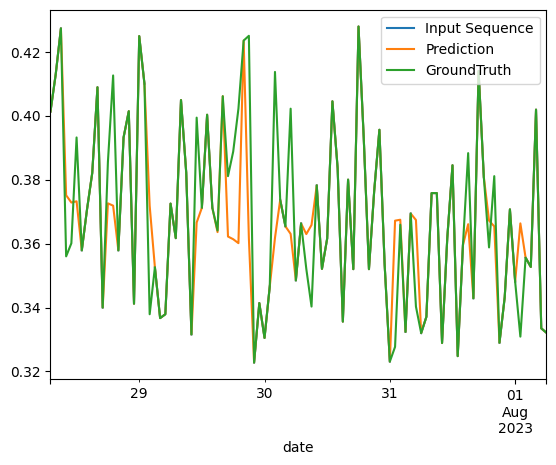

In [18]:
im.visual(df, pred, "soil_moisture", "imputation.pdf", label)

In [14]:
label

,date,soil_moisture,soil_moisture_flag,soil_moisture_orig_flag
0,2023-07-28 07:00:00,0.4013,G,M
1,2023-07-28 08:00:00,0.4129,G,M
2,2023-07-28 09:00:00,0.4273,G,M
3,2023-07-28 10:00:00,0.3560,G,M
4,2023-07-28 11:00:00,0.3601,G,M
...,...,...,...,...
91,2023-08-01 02:00:00,0.3556,G,M
92,2023-08-01 03:00:00,0.3527,G,M
93,2023-08-01 04:00:00,0.4019,G,M
94,2023-08-01 05:00:00,0.3335,G,M


In [17]:
pred

,date,soil_moisture
0,2023-07-28 07:00:00,0.401300
1,2023-07-28 08:00:00,0.412900
2,2023-07-28 09:00:00,0.427300
3,2023-07-28 10:00:00,0.375119
4,2023-07-28 11:00:00,0.372843
...,...,...
91,2023-08-01 02:00:00,0.355600
92,2023-08-01 03:00:00,0.352700
93,2023-08-01 04:00:00,0.401900
94,2023-08-01 05:00:00,0.333500
